## 1. Data Loading and Preprocessing
Start by loading the dataset into a pandas DataFrame, checking for missing values, and handling any data quality issues.

In [1]:
import pandas as pd

# Load the dataset 
file_path = 'Amazon Sales data.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

# Check for missing values and data types
print(data.info())


                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

## 2. Data Cleaning
Date Formatting: Ensure that date fields (Order Date, Ship Date) are in datetime format for trend analysis.
Missing Values: Handle missing values in essential columns like Units Sold, Total Revenue, and Total Profit.

In [2]:
# Convert date columns to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Check for missing values
print(data.isnull().sum())

# Fill missing values (if any) or drop irrelevant rows
data.fillna(method='ffill', inplace=True)


Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


C:\Users\tikul\AppData\Local\Temp\ipykernel_25460\308726779.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


## 3. Exploratory Data Analysis (EDA)
3.1 Sales Performance Over Time
Analyze how sales have trended over time.

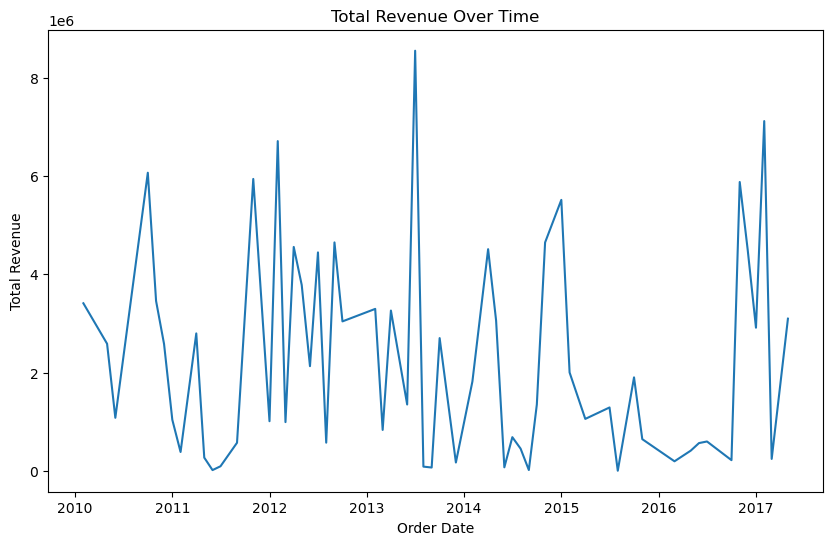

In [5]:
import matplotlib.pyplot as plt

# Group by Order Date (converted to period) and sum only numerical columns
sales_over_time = data.groupby(data['Order Date'].dt.to_period('M')).sum(numeric_only=True)

# Plot total revenue over time
plt.figure(figsize=(10,6))
plt.plot(sales_over_time.index.to_timestamp(), sales_over_time['Total Revenue'])
plt.title('Total Revenue Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.show()


3.2 Top-Selling Products
Identify the most sold products and regions.

Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Name: Total Revenue, dtype: float64


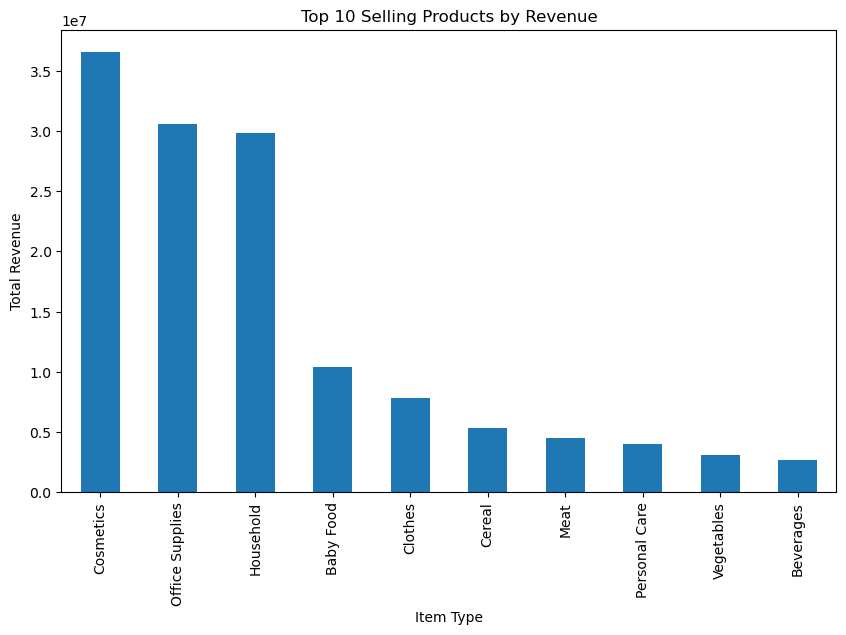

In [6]:
# Top products by total revenue
top_products = data.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Visualize top-selling products
top_products.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Selling Products by Revenue')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.show()


3.3 Geographical Analysis
Analyze sales performance by region and country.

Region
Sub-Saharan Africa                   39672031.43
Europe                               33368932.11
Asia                                 21347091.02
Australia and Oceania                14094265.13
Middle East and North Africa         14052706.58
Central America and the Caribbean     9170385.49
North America                         5643356.55
Name: Total Revenue, dtype: float64


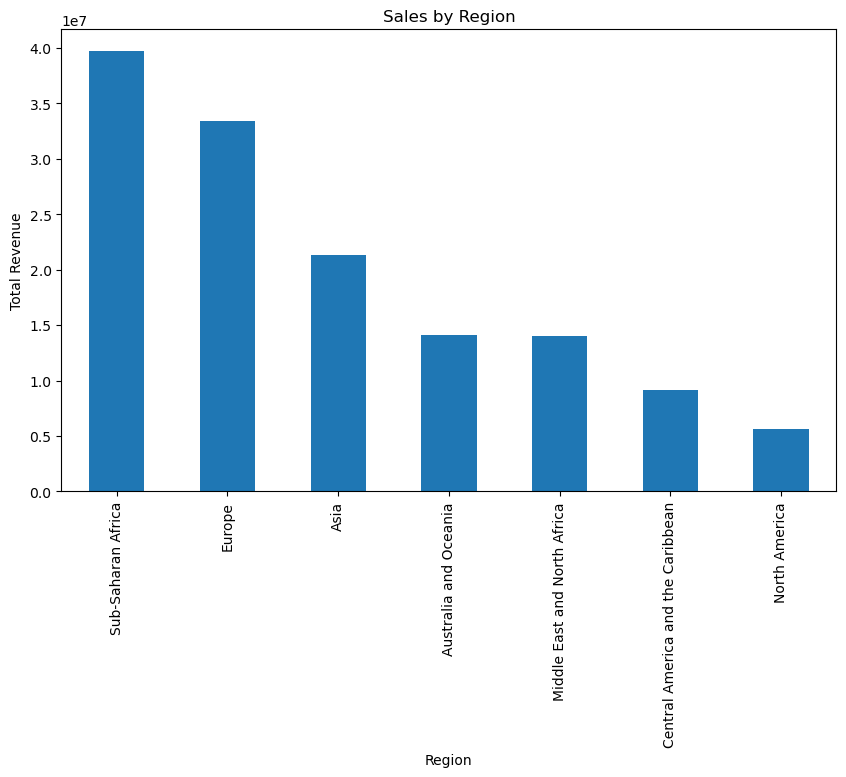

In [8]:
# Sales by region
region_sales = data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
print(region_sales)

# Visualize sales by region
region_sales.plot(kind='bar', figsize=(10,6))
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()


## 4. Feature Engineering
Add new features like profit margin or categorize orders by sales channels to improve insights.

In [9]:
# Add profit margin column
data['Profit Margin'] = (data['Total Profit'] / data['Total Revenue']) * 100

# Categorize sales by channel
sales_by_channel = data.groupby('Sales Channel')['Total Revenue'].sum()
print(sales_by_channel)


Sales Channel
Offline    79094809.20
Online     58253959.11
Name: Total Revenue, dtype: float64


## 5. Predictive Modeling
You can build a predictive model to forecast future sales based on historical data.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target
X = data[['Units Sold', 'Unit Price', 'Unit Cost']]
y = data['Total Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')


MSE: 322510611072.7175
R^2: 0.8543165315212506


 ## 6: Visualization and Reporting

### 1. Sales Trend Over Time

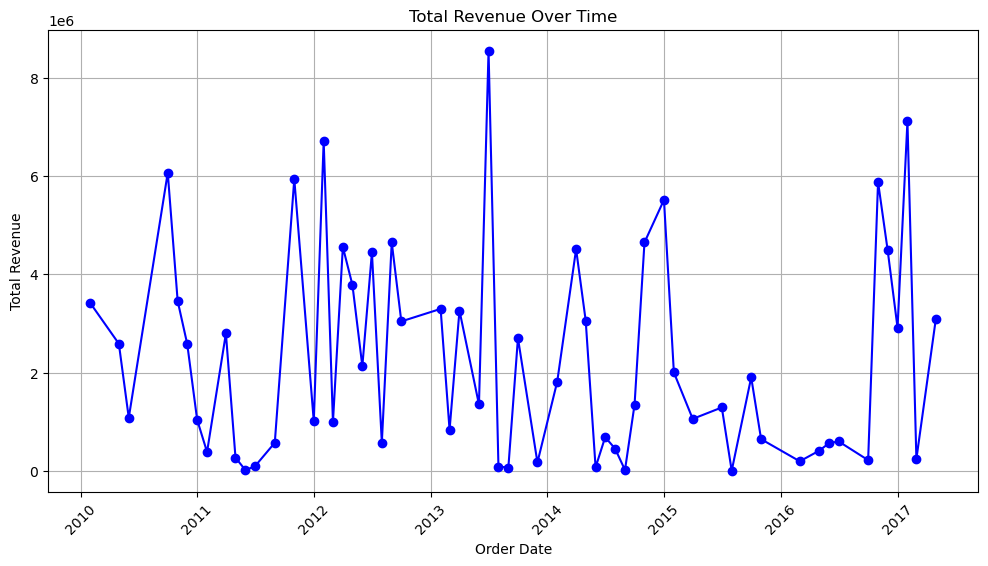

In [12]:
import matplotlib.pyplot as plt

# Group by Order Date (converted to month) and sum total revenue
sales_over_time = data.groupby(data['Order Date'].dt.to_period('M')).sum(numeric_only=True)

# Plot total revenue over time
plt.figure(figsize=(12,6))
plt.plot(sales_over_time.index.to_timestamp(), sales_over_time['Total Revenue'], marker='o', color='b')
plt.title('Total Revenue Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### 2. Top 10 Selling Products

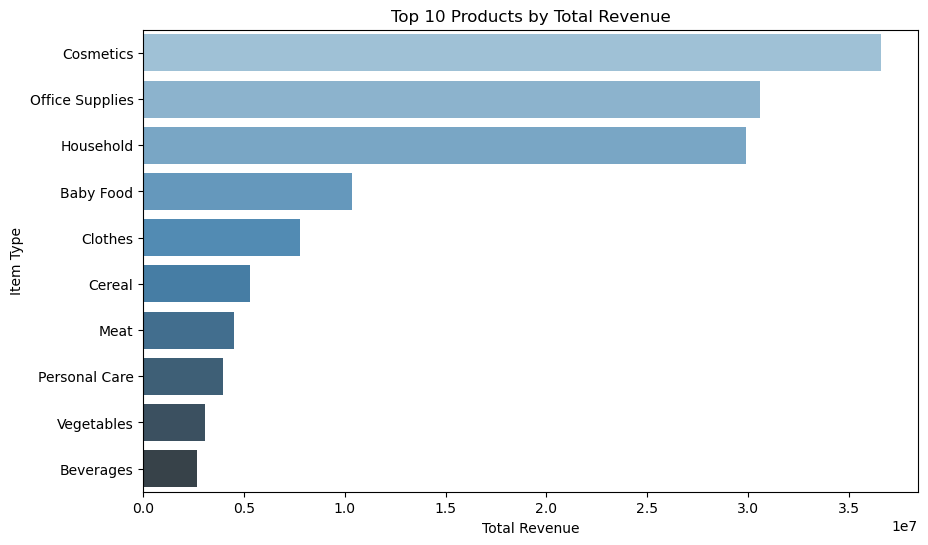

In [13]:
import seaborn as sns

# Calculate total revenue per product
top_products = data.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False).head(10)

# Bar plot for top 10 products by revenue
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_d")
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Item Type')
plt.show()


### 3. Sales by Region

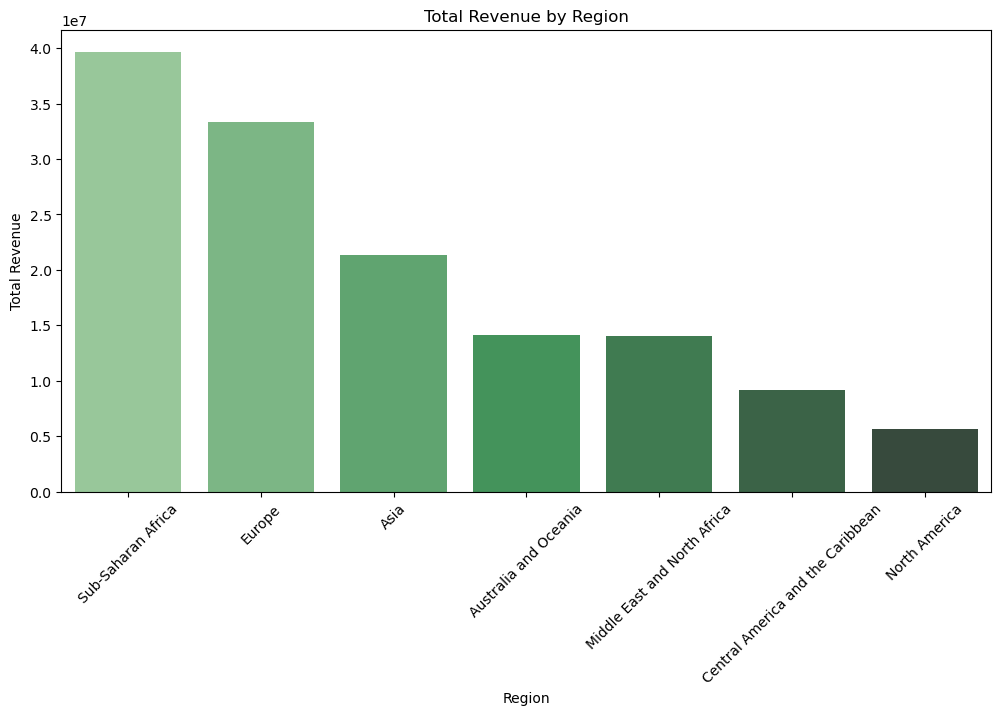

In [14]:
# Group by Region to get total revenue
region_sales = data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

# Bar plot for sales by region
plt.figure(figsize=(12,6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="Greens_d")
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


### 4. Sales Channel Performance


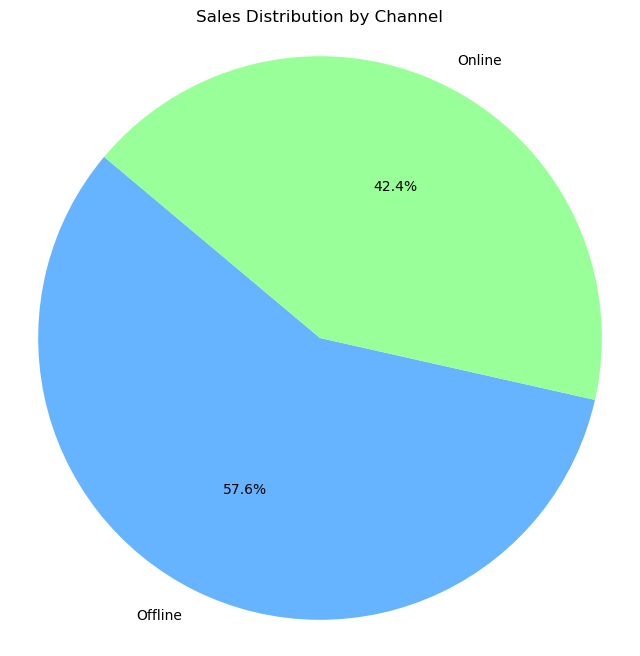

In [15]:
# Sales by channel
channel_sales = data.groupby('Sales Channel')['Total Revenue'].sum()

# Pie chart for sales channel distribution
plt.figure(figsize=(8,8))
plt.pie(channel_sales, labels=channel_sales.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Sales Distribution by Channel')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


### 5. Profit vs. Revenue


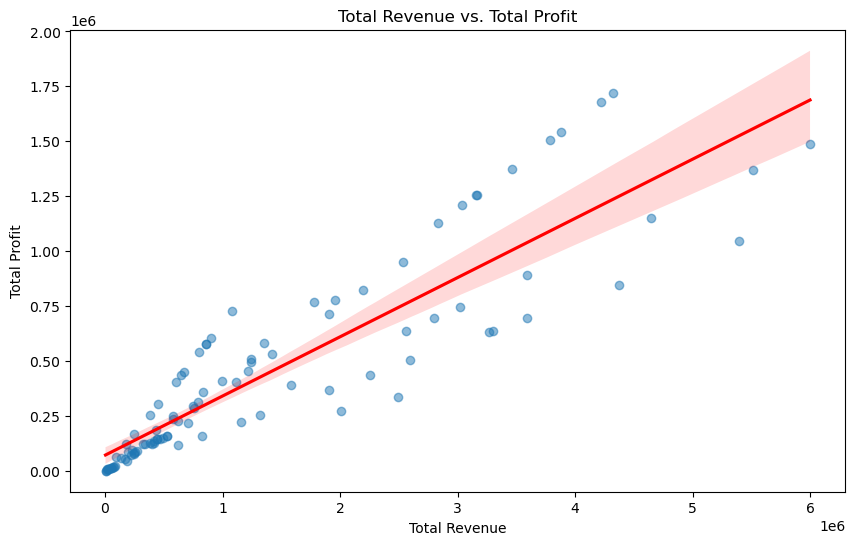

In [16]:
# Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='Total Revenue', y='Total Profit', data=data, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Total Revenue vs. Total Profit')
plt.xlabel('Total Revenue')
plt.ylabel('Total Profit')
plt.show()


### 6. Profit Margins by Product Type


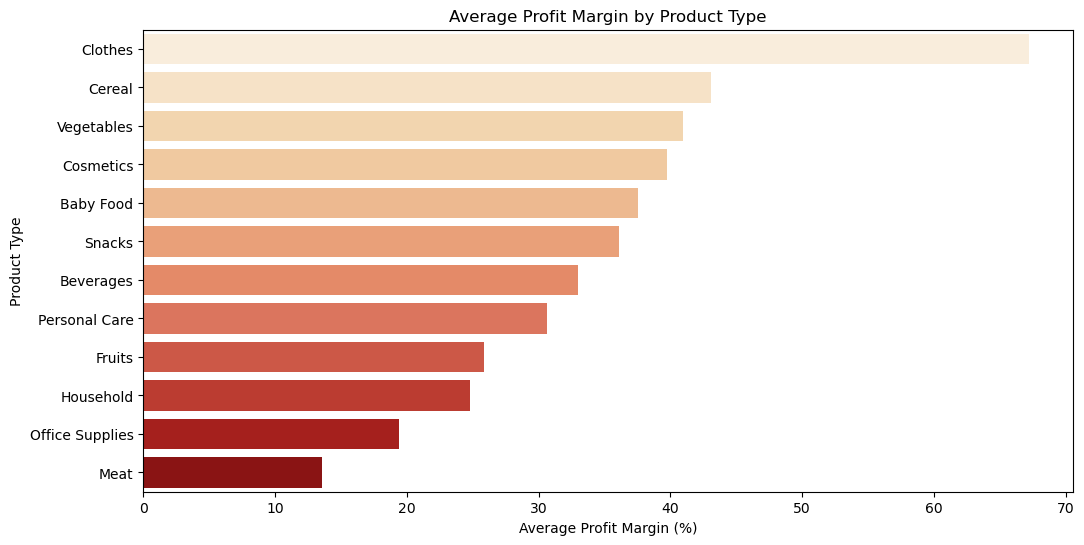

In [17]:
# Add profit margin column
data['Profit Margin'] = (data['Total Profit'] / data['Total Revenue']) * 100

# Calculate average profit margin by product type
product_margin = data.groupby('Item Type')['Profit Margin'].mean().sort_values(ascending=False)

# Bar plot for average profit margin by product type
plt.figure(figsize=(12,6))
sns.barplot(x=product_margin.values, y=product_margin.index, palette="OrRd")
plt.title('Average Profit Margin by Product Type')
plt.xlabel('Average Profit Margin (%)')
plt.ylabel('Product Type')
plt.show()


### 7. Monthly Sales Quantity

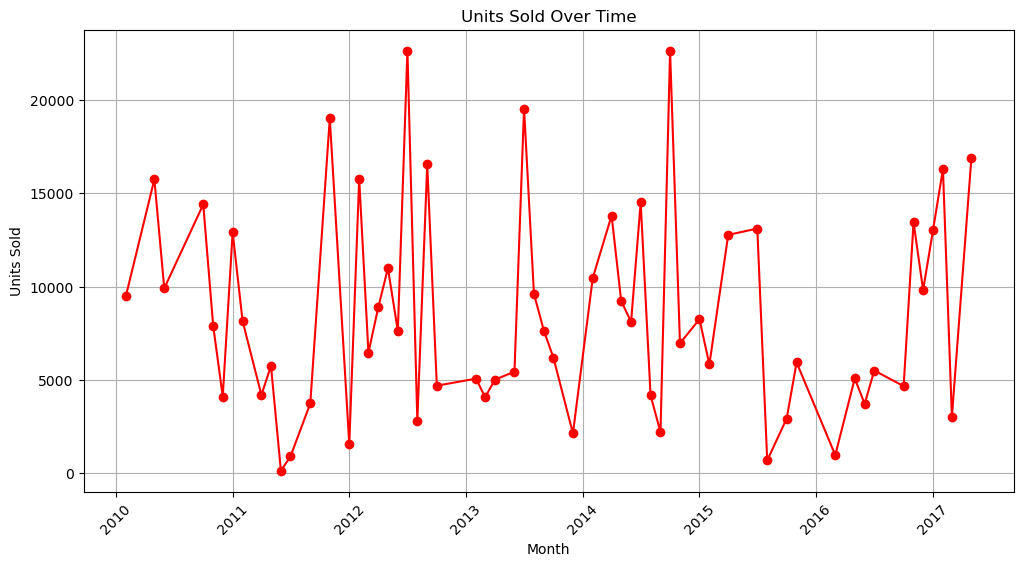

In [18]:
# Group by Order Date to get total units sold per month
units_sold_per_month = data.groupby(data['Order Date'].dt.to_period('M'))['Units Sold'].sum()

# Line plot for units sold over time
plt.figure(figsize=(12,6))
plt.plot(units_sold_per_month.index.to_timestamp(), units_sold_per_month.values, marker='o', color='r')
plt.title('Units Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### 8. Heatmap for Correlation Analysis


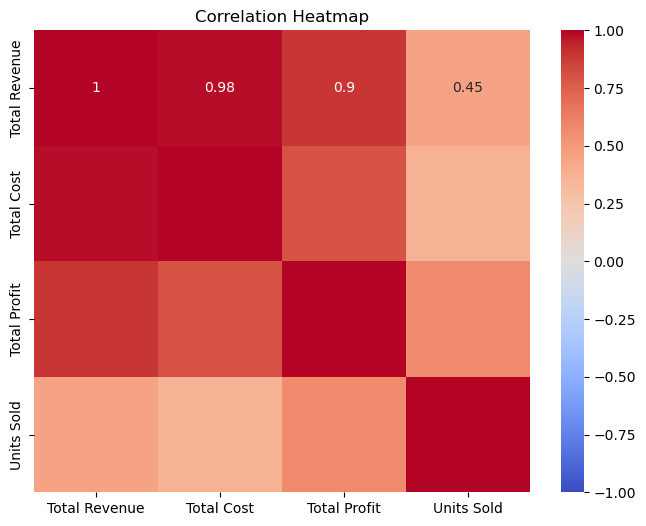

In [19]:
# Correlation matrix
corr = data[['Total Revenue', 'Total Cost', 'Total Profit', 'Units Sold']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
